# Module 3 Project: Classification
By: Bradley Ellisor & Gabe Arnold




In [67]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
def clean_drop(data):
    """Provide data frame in parenthesis and this function will
        drop nulls permanently, and reset the index."""
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    return data
def reset_index(data):
    """Provide data frame in parenthesis and this function will
        reset your index."""
    data.reset_index(drop=True, inplace=True)
    return data
def make_value_chart(data, column, x_label, y_label, title, color='PRGn'):
    """Must fill out all arguments EXCEPT color. Color has a default setting."""
    fig, ax = plt.subplots(figsize=(14,8))
    ax = sns.barplot(x=list(data[column].value_counts().keys()),
     y=data[column].value_counts(), palette=color)    
    ax.set_xticklabels(ax.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
    plt.xlabel(x_label, size=20)
    plt.ylabel(y_label, size=20)
    plt.title(title, size=26)
    return plt.show()
def rename_column(data, column, new_name):
    """Quickly renames columns"""
    data.rename(columns={column: new_name}, inplace=True)
    return data
def drop(data, columns=[]):
    """Quickly drops columns"""
    data.drop(columns=columns, inplace=True)
    return data
def dummy_up(data, column, prefix):
    """Quickly makes dummies for the selected column"""
    new = pd.get_dummies(data[column], prefix=prefix, drop_first=True)
    return new
def factorize(data, column):
    new = pd.factorize(data[column])[0] + 1
    return new


# Read in Data & Data Cleaning

In [3]:
## Read in Data
df = pd.read_csv('bank-additional-full.csv', sep =';')


In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df['education']= df['education'].replace('unknown', 'other_edu')
df['job']= df['job'].replace('unknown', 'other_job')

In [7]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
df=df.replace('unknown', np.NaN)

In [9]:
clean_drop(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
31756,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
31757,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
31758,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
yes_no = {'no': 0,
         'yes': 1}

In [11]:
df.replace(yes_no, inplace=True)

In [12]:
for (columnName, columnData) in df.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.unique())

Colunm Name :  age
Column Contents :  [56 37 40 59 24 25 29 57 35 50 30 55 41 46 49 54 34 52 32 38 45 39 60 53
 51 48 44 33 31 42 36 43 28 58 27 47 26 22 23 20 21 18 70 61 66 76 67 73
 88 95 19 77 68 75 63 62 65 72 82 64 71 69 78 85 80 79 83 81 74 17 87 91
 94 86 84 92 89]
Colunm Name :  job
Column Contents :  ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed'
 'other_job']
Colunm Name :  marital
Column Contents :  ['married' 'single' 'divorced']
Colunm Name :  education
Column Contents :  ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'other_edu' 'illiterate']
Colunm Name :  default
Column Contents :  [0 1]
Colunm Name :  housing
Column Contents :  [0 1]
Colunm Name :  loan
Column Contents :  [0 1]
Colunm Name :  contact
Column Contents :  ['telephone' 'cellular']
Colunm Name :  month
Column Contents :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr

In [13]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'unemployed', 'retired', 'entrepreneur', 'management', 'student',
       'self-employed', 'other_job'], dtype=object)

In [14]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'other_edu', 'illiterate'],
      dtype=object)

In [15]:
drop(df, 'duration')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,73,retired,married,professional.course,0,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
31756,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31757,56,retired,married,university.degree,0,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31758,44,technician,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [16]:
df.default.value_counts()

0    31757
1        3
Name: default, dtype: int64

In [17]:
drop(df, 'default')

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,73,retired,married,professional.course,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
31756,46,blue-collar,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31757,56,retired,married,university.degree,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
31758,44,technician,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
df['age'].describe()

count    31760.00000
mean        39.14745
std         10.47959
min         17.00000
25%         31.00000
50%         37.00000
75%         46.00000
max         95.00000
Name: age, dtype: float64

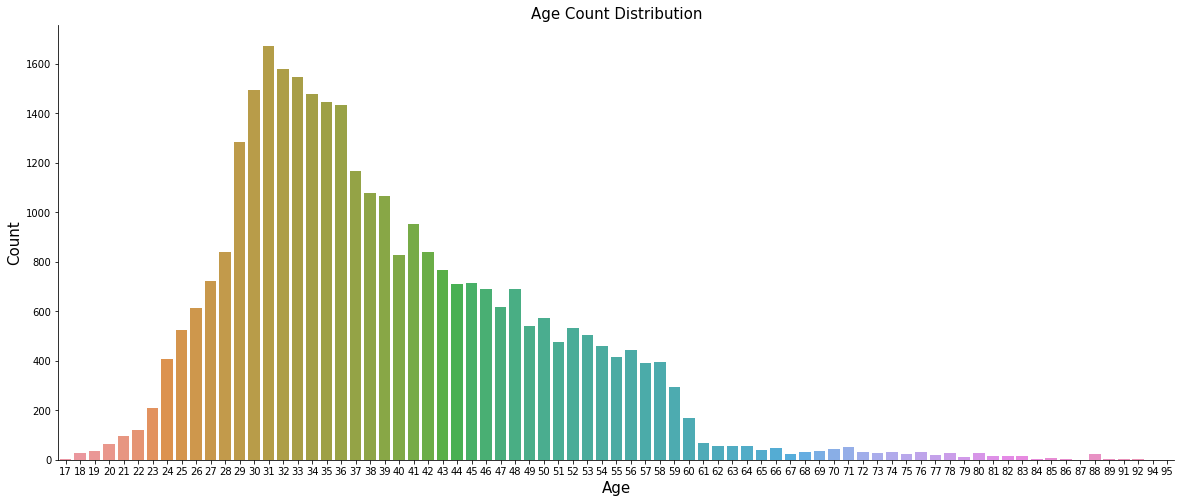

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [20]:
#bin the ages seperated out by decade

df['age_bin'] = pd.cut(df['age'],9, labels = ['10s','20s', '30s', '40s','50s','60s','70s','80s','90s'])
df[['age', 'age_bin']]
dums = pd.get_dummies(df['age_bin'])
df.drop(columns=['age'], axis =1, inplace =True)
df=df.join(dums)

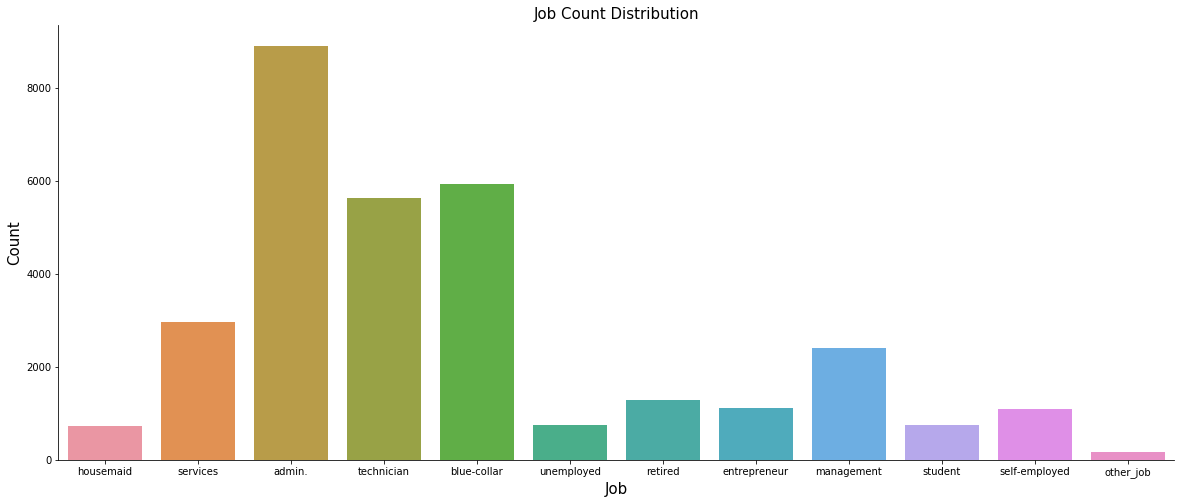

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
sns.despine()

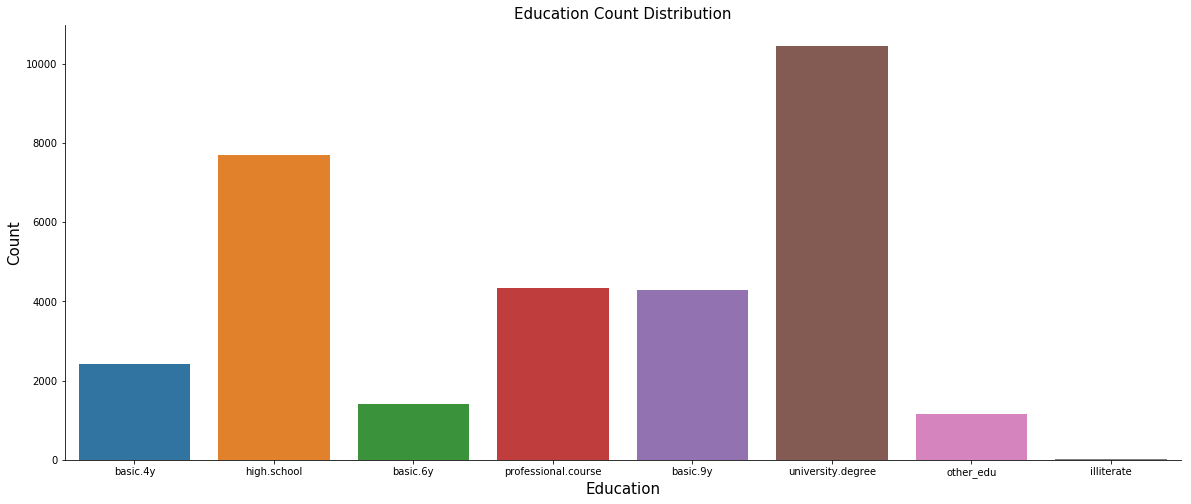

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
sns.despine()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31760 entries, 0 to 31759
Data columns (total 28 columns):
job               31760 non-null object
marital           31760 non-null object
education         31760 non-null object
housing           31760 non-null int64
loan              31760 non-null int64
contact           31760 non-null object
month             31760 non-null object
day_of_week       31760 non-null object
campaign          31760 non-null int64
pdays             31760 non-null int64
previous          31760 non-null int64
poutcome          31760 non-null object
emp.var.rate      31760 non-null float64
cons.price.idx    31760 non-null float64
cons.conf.idx     31760 non-null float64
euribor3m         31760 non-null float64
nr.employed       31760 non-null float64
y                 31760 non-null int64
age_bin           31760 non-null category
10s               31760 non-null uint8
20s               31760 non-null uint8
30s               31760 non-null uint8
40s          

## Hypothesis Testing

In [24]:
mc = MultiComparison(df['y'], df['age_bin'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10s    20s  -0.0916  0.001 -0.1198 -0.0634   True
   10s    30s  -0.1219  0.001 -0.1504 -0.0934   True
   10s    40s  -0.1194  0.001 -0.1496 -0.0892   True
   10s    50s   -0.084  0.001 -0.1155 -0.0524   True
   10s    60s   0.2074  0.001  0.1503  0.2646   True
   10s    70s   0.2253  0.001  0.1563  0.2943   True
   10s    80s   0.2952  0.001   0.201  0.3894   True
   10s    90s   0.2171 0.0071  0.0343  0.3998   True
   20s    30s  -0.0303  0.001 -0.0446 -0.0161   True
   20s    40s  -0.0278  0.001 -0.0451 -0.0104   True
   20s    50s   0.0076    0.9 -0.0119  0.0272  False
   20s    60s    0.299  0.001  0.2475  0.3505   True
   20s    70s   0.3169  0.001  0.2525  0.3813   True
   20s    80s   0.3868  0.001  0.2959  0.4777   True
   20s    90s   0.3087  0.001  0.1276  0.4897   True
   30s    40s   0.0026    0.9 -0.0153  0.0204 

In [25]:
mc = MultiComparison(df['y'], df['education'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           basic.4y            basic.6y    -0.04 0.0088  -0.074  -0.006   True
           basic.4y            basic.9y  -0.0483  0.001 -0.0741 -0.0226   True
           basic.4y         high.school  -0.0156 0.4799 -0.0393   0.008  False
           basic.4y          illiterate   0.1357 0.8758 -0.1704  0.4418  False
           basic.4y           other_edu   0.0473  0.002   0.011  0.0835   True
           basic.4y professional.course  -0.0125 0.8012 -0.0382  0.0133  False
           basic.4y   university.degree   0.0115 0.7667 -0.0114  0.0344  False
           basic.6y            basic.9y  -0.0084    0.9 -0.0395  0.0228  False
           basic.6y         high.school   0.0243 0.1912 -0.0051  0.0538  False
           basic.6y          illiterate   0.1757 0.6

## Feature Engineering

In [26]:
df.head()

,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0
1,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0
2,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0
3,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0
4,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0


In [27]:
dums = pd.get_dummies(df['job'])
df.drop(columns=['job'], axis =1, inplace =True)
df=df.join(dums)

In [28]:
dums = pd.get_dummies(df['marital'])
df.drop(columns=['marital'], axis =1, inplace =True)
df=df.join(dums)

In [29]:
df.head()

,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,other_job,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
dums = pd.get_dummies(df['education'])
df.drop(columns=['education'], axis =1, inplace =True)
df=df.join(dums)

In [31]:
dums = pd.get_dummies(df['contact'])
df.drop(columns=['contact'], axis =1, inplace =True)
df=df.join(dums)

In [32]:
dums = pd.get_dummies(df['month'])
df.drop(columns=['month'], axis =1, inplace =True)
df=df.join(dums)

In [33]:
dums = pd.get_dummies(df['day_of_week'])
df.drop(columns=['day_of_week'], axis =1, inplace =True)
df=df.join(dums)

In [34]:
dums = pd.get_dummies(df['poutcome'])
df.drop(columns=['poutcome'], axis =1, inplace =True)
df=df.join(dums)

In [35]:
drop(df, 'pdays')

,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,other_job,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,other_edu,professional.course,university.degree,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,1,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,70s,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31756,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,40s,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31757,1,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,50s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31758,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,40s,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [36]:
drop(df, 'age_bin')

,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,other_job,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,other_edu,professional.course,university.degree,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,1,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31756,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31757,1,0,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
31758,0,0,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [38]:
col_to_norm = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[col_to_norm] = df[col_to_norm].apply(lambda x: (x - x.min()) /(x.max() - x.min()), axis=0)
df.head()

,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,other_job,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,other_edu,professional.course,university.degree,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,0,0,1,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


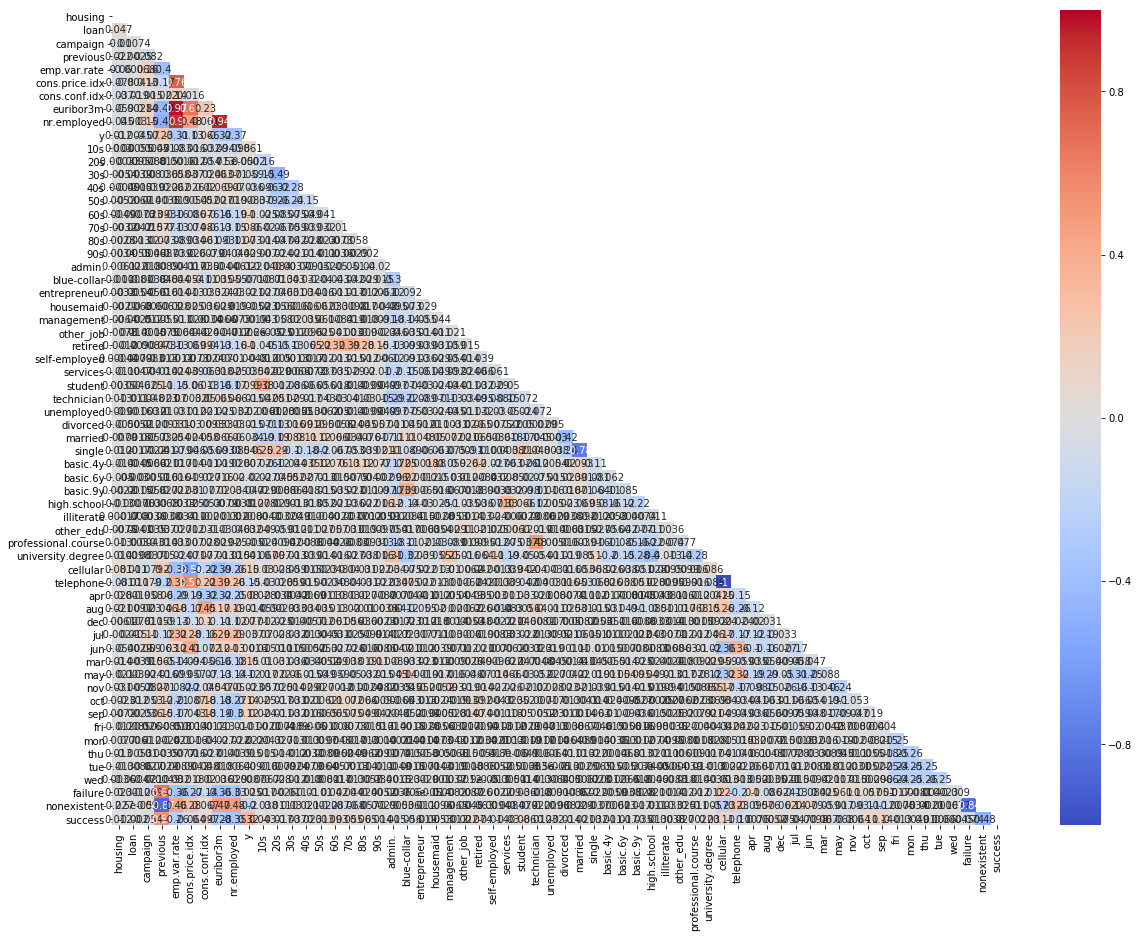

In [39]:
# Looking for multicollinearity
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [40]:
df.to_csv('model_ready1.csv')

In [41]:
df.columns

Index(['housing', 'loan', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'other_job',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'divorced', 'married', 'single', 'basic.4y', 'basic.6y',
       'basic.9y', 'high.school', 'illiterate', 'other_edu',
       'professional.course', 'university.degree', 'cellular', 'telephone',
       'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'fri', 'mon', 'thu', 'tue', 'wed', 'failure', 'nonexistent', 'success'],
      dtype='object')

# Modeling

In [42]:
X = df.drop(['y', 'housing', 'loan', 'campaign', 'previous'], axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [43]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Logistic Regression

In [44]:
logreg = LogisticRegression(C=1e14, solver = 'lbfgs', fit_intercept=False)
model_1 = logreg.fit(X_train, y_train)
y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

In [45]:
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6905
           1       0.66      0.23      0.34      1035

    accuracy                           0.88      7940
   macro avg       0.78      0.61      0.64      7940
weighted avg       0.86      0.88      0.86      7940



In [46]:
logmodel = LogisticRegression(class_weight='balanced') 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

[[5787 1118]
 [ 377  658]]
81.0


# KNN

k=1 63.67 (+/- 2.39)
k=2 51.13 (+/- 2.69)
k=3 65.10 (+/- 2.27)
k=4 56.86 (+/- 2.39)
k=5 65.49 (+/- 1.83)
k=6 58.79 (+/- 2.58)
k=7 65.12 (+/- 2.11)
k=8 59.33 (+/- 2.18)
k=9 65.02 (+/- 2.17)
k=10 60.07 (+/- 1.48)
k=11 64.69 (+/- 1.60)
k=12 59.67 (+/- 1.52)
k=13 63.52 (+/- 1.84)
k=14 59.90 (+/- 1.80)
k=15 63.28 (+/- 1.92)
k=16 59.76 (+/- 1.73)
k=17 62.81 (+/- 1.45)
k=18 60.11 (+/- 1.94)
k=19 62.24 (+/- 1.94)
k=20 59.46 (+/- 2.12)
k=21 61.88 (+/- 1.81)
k=22 59.34 (+/- 1.91)
k=23 62.00 (+/- 1.74)
k=24 59.26 (+/- 1.46)
k=25 61.21 (+/- 1.19)
The optimal number of neighbors is 4 with 65.5%


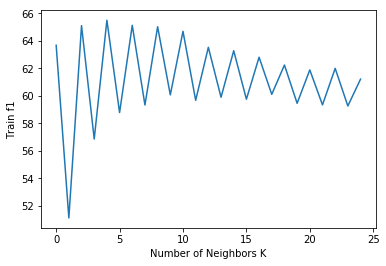

In [47]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size = 0.2, random_state = 42)
#Neighbors
neighbors = np.arange(0,25)
#Create empty list that will hold cv scores
cv_scores = []
#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='f1')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train f1')
plt.show()


In [48]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

[[6741  164]
 [ 842  193]]
87.0


# Decision Tree

In [49]:
dtree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

[[5820 1085]
 [ 629  406]]
78.0


# Random Forest

In [50]:
regressor = RandomForestRegressor(n_estimators = 10, random_state= 42)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
y_pred = regressor.predict(X_test)

In [52]:
rfc = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced')
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'f1').mean())

[[6318  587]
 [ 660  375]]
84.0


In [53]:
f1_score(y_test, y_pred.round(), average='weighted')

0.9421712937100037

In [54]:
y_pred.dtype

dtype('float64')

# XGBoost

In [55]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10, scoring = 'f1').mean())

[[6692  213]
 [ 728  307]]
88.0


In [56]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier',
                           'K-Near Neighbors', 'Logistic Model',  'XGBoost'],
                'Score':  [RFCCV, DTREECV, KNNCV, LOGCV, XGB]})
models.sort_values(by='Score', ascending=False)

,Models,Score
3,Logistic Model,0.481063
4,XGBoost,0.396604
0,Random Forest Classifier,0.371836
1,Decision Tree Classifier,0.335351
2,K-Near Neighbors,0.262726


# Tuning

In [63]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


In [64]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.8835012594458438


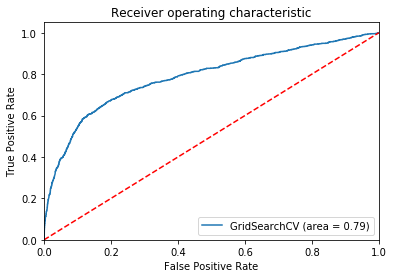

In [68]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
classes = best_clf.predict(X_test)

accuracy = metrics.accuracy_score(classes, y_test)

balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)

average_precision = metrics.average_precision_score(classes, y_test)

f1_score = metrics.f1_score(classes, y_test)

recall = metrics.recall_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.8835012594458438 0.7751466130732736 0.22318840579710145 0.16170668601467528 0.33309300648882484 0.65625 0.7871995718288574


In [71]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      7588
           1       0.22      0.66      0.33       352

    accuracy                           0.88      7940
   macro avg       0.60      0.78      0.63      7940
weighted avg       0.95      0.88      0.91      7940

